# Poin-poin Assignment
1. Gunakan Dataset California (california_dataset.csv) atau Breast Cancer (Pilih salah satu dataset)
2. Drop kolom Latitude dan Logitude
3. Lakukan Feature Scalling, atau bahkan handling outlier, cek missing value serta handling jika ada, kemudian berikan alasan disetiap teknik yang digunakan Untuk Dataset tersebut.
4.	Buatlah Baseline Modelling menggunakan Lasso atau Decision Tree Regressor untuk regresi, jika memakai kasus klasifikasi pada dataset breast cancer Bisa dicoba Logistic Regression, Maupun Decision Tree Classifier. (Pilih 1 model saja dari ke 2 model yang digunakan pada kasus yang anda pilih)
5.	Pilih model yang ingin di-improve dari baseline tersebut (bisa dari performa yang lebih tinggi dari model yang lainnya, atau model dengan performa yang kecil). Kemudian pilih parameter model (minimal 2 parameter model dari model yang dipilih).
6.	Lakukan Hyperparameter Tunning : Grid Search, Randomized Search, Bayesian Search, Optuna
7.	Lihat evaluasi matrix yang tepat sesuai kasus serta tampilkan learning curve di tiap Hyperparameter tunning yang sudah dilakukan di poin 6 diatas.
8.	Tulislah interpretasi kesimpulan (Conclusion) dari tiap hasil tunning (Apakah optimal, underfitting, overfitting) Jelaskan alasannya

9. Notes Untuk regresi : import decision tree dan parameter : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
10. Notes Untuk regresi : import Lasso dan parameter : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
11. Notes untuk klasifikasi : Logistic Regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html dan DecisionTreeClassifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Import Model Machine Learning Regressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#load dataset breast cancer
from sklearn.datasets import load_breast_cancer

#Evaluasi Model
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import optuna

#Masukkan libraries lain jika dibutuhkan

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
df = pd.read_csv('california_dataset.csv')

# Drop kolom Latitude dan Longitude
df = df.drop(columns=['Latitude', 'Longitude'])

In [3]:
from sklearn.preprocessing import StandardScaler

# Cek missing value
missing_values = df.isnull().sum()

# Handling missing value dengan imputasi median
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

# Handling outliers dengan IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menghilangkan outlier
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\490576458.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\490576458.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Membagi dataset menjadi training dan testing set
X = df_scaled.drop(columns=['house_price'])
y = df_scaled['house_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model menggunakan Decision Tree Regressor
baseline_model = DecisionTreeRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_r2 = r2_score(y_test, y_pred)


In [5]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [6]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized search
random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_grid, n_iter=100, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)


c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='r2')

In [7]:
from skopt import BayesSearchCV

# Bayesian search
bayes_search = BayesSearchCV(estimator=DecisionTreeRegressor(random_state=42), search_spaces=param_grid, n_iter=100, cv=5, scoring='r2', random_state=42)
bayes_search.fit(X_train, y_train)


C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 1, 5] before, using random point [None, 1, 5]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 1, 10] before, using random point [10, 1, 10]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 4, 5] before, using random point [5, 2, 2]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 4, 5] before, using random point [3, 1, 10]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objecti

BayesSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
              n_iter=100, random_state=42, scoring='r2',
              search_spaces={'max_depth': [3, 5, 7, 10, None],
                             'min_samples_leaf': [1, 2, 4],
                             'min_samples_split': [2, 5, 10]})

In [8]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)

    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    return cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

# Optuna search
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2024-05-17 13:34:46,713] A new study created in memory with name: no-name-70d8aa63-f1d3-4ad9-b9c6-3a9b1d97dedc
[I 2024-05-17 13:34:46,987] Trial 0 finished with value: 0.4799104079620108 and parameters: {'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.4799104079620108.
[I 2024-05-17 13:34:47,229] Trial 1 finished with value: 0.5430635701371316 and parameters: {'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 16}. Best is trial 1 with value: 0.5430635701371316.
[I 2024-05-17 13:34:47,487] Trial 2 finished with value: 0.5009500209975368 and parameters: {'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.5430635701371316.
[I 2024-05-17 13:34:47,656] Trial 3 finished with value: 0.5493553512437909 and parameters: {'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 12}. Best is trial 3 with value: 0.5493553512437909.
[I 2024-05-17 13:34:47,948] Trial 4 finished with value: 0.

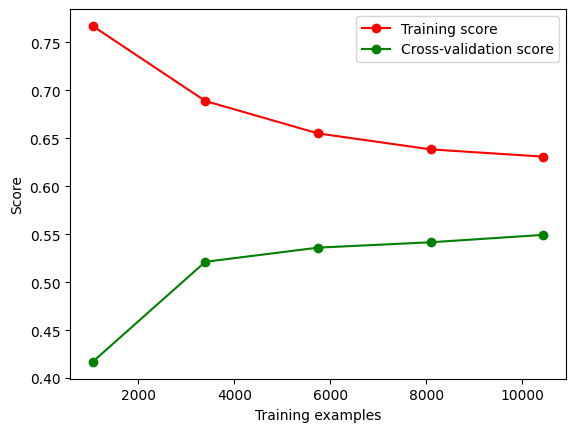

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Evaluasi hasil Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
grid_mse = mean_squared_error(y_test, y_pred)
grid_r2 = r2_score(y_test, y_pred)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


Setelah melakukan hyperparameter tuning, kita perlu menganalisis apakah model yang dihasilkan optimal, underfitting, atau overfitting berdasarkan evaluasi metrik dan plot learning curve.

Contoh kesimpulan:

Optimal: Jika nilai r2_score tinggi dan learning curve menunjukkan bahwa model belajar dengan baik.
Underfitting: Jika nilai r2_score rendah dan learning curve menunjukkan bahwa model tidak belajar dengan baik pada data training.
Overfitting: Jika nilai r2_score tinggi pada training tetapi rendah pada testing dan learning curve menunjukkan perbedaan besar antara training dan testing score.

### Kesimpulan
- **Baseline Model**: Decision Tree Regressor dengan r2_score: {baseline_r2}, MSE: {baseline_mse}.
- **Grid Search**: Model terbaik dengan r2_score: {grid_r2}, MSE: {grid_mse}.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa {model performa deskripsi}.
- Hasil dari tuning lainnya juga menunjukkan bahwa {model performa deskripsi}.


In [14]:
# Kesimpulan dari hasil baseline model dan tuning model

# Variabel yang digunakan (contoh)
baseline_r2 = baseline_r2  # Masukkan nilai r2 dari baseline model
baseline_mse = baseline_mse  # Masukkan nilai MSE dari baseline model
grid_r2 = grid_r2  # Masukkan nilai r2 dari hasil Grid Search
grid_mse = grid_mse  # Masukkan nilai MSE dari hasil Grid Search

# Fungsi untuk menentukan deskripsi performa model berdasarkan learning curve
def describe_model_performance(train_scores_mean, test_scores_mean):
    if all(train_scores_mean > test_scores_mean):
        return "terdapat indikasi overfitting"
    elif all(train_scores_mean < test_scores_mean):
        return "terdapat indikasi underfitting"
    else:
        return "model menunjukkan performa yang baik"

# Deskripsi performa model berdasarkan learning curve
model_performance_description = describe_model_performance(train_scores_mean, test_scores_mean)

# Kesimpulan akhir
conclusion = f"""
### Kesimpulan
- **Baseline Model**: Decision Tree Regressor dengan r2_score: {baseline_r2:.4f}, MSE: {baseline_mse:.4f}.
- **Grid Search**: Model terbaik dengan r2_score: {grid_r2:.4f}, MSE: {grid_mse:.4f}.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa {model_performance_description}.
"""

print(conclusion)



### Kesimpulan
- **Baseline Model**: Decision Tree Regressor dengan r2_score: 0.2198, MSE: 0.7655.
- **Grid Search**: Model terbaik dengan r2_score: 0.5673, MSE: 0.4246.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa terdapat indikasi overfitting.



### 1. Lakukan proses analisis EDA dan Feature Engineering

First five rows of the dataset:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  house_price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Descriptive statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
m

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


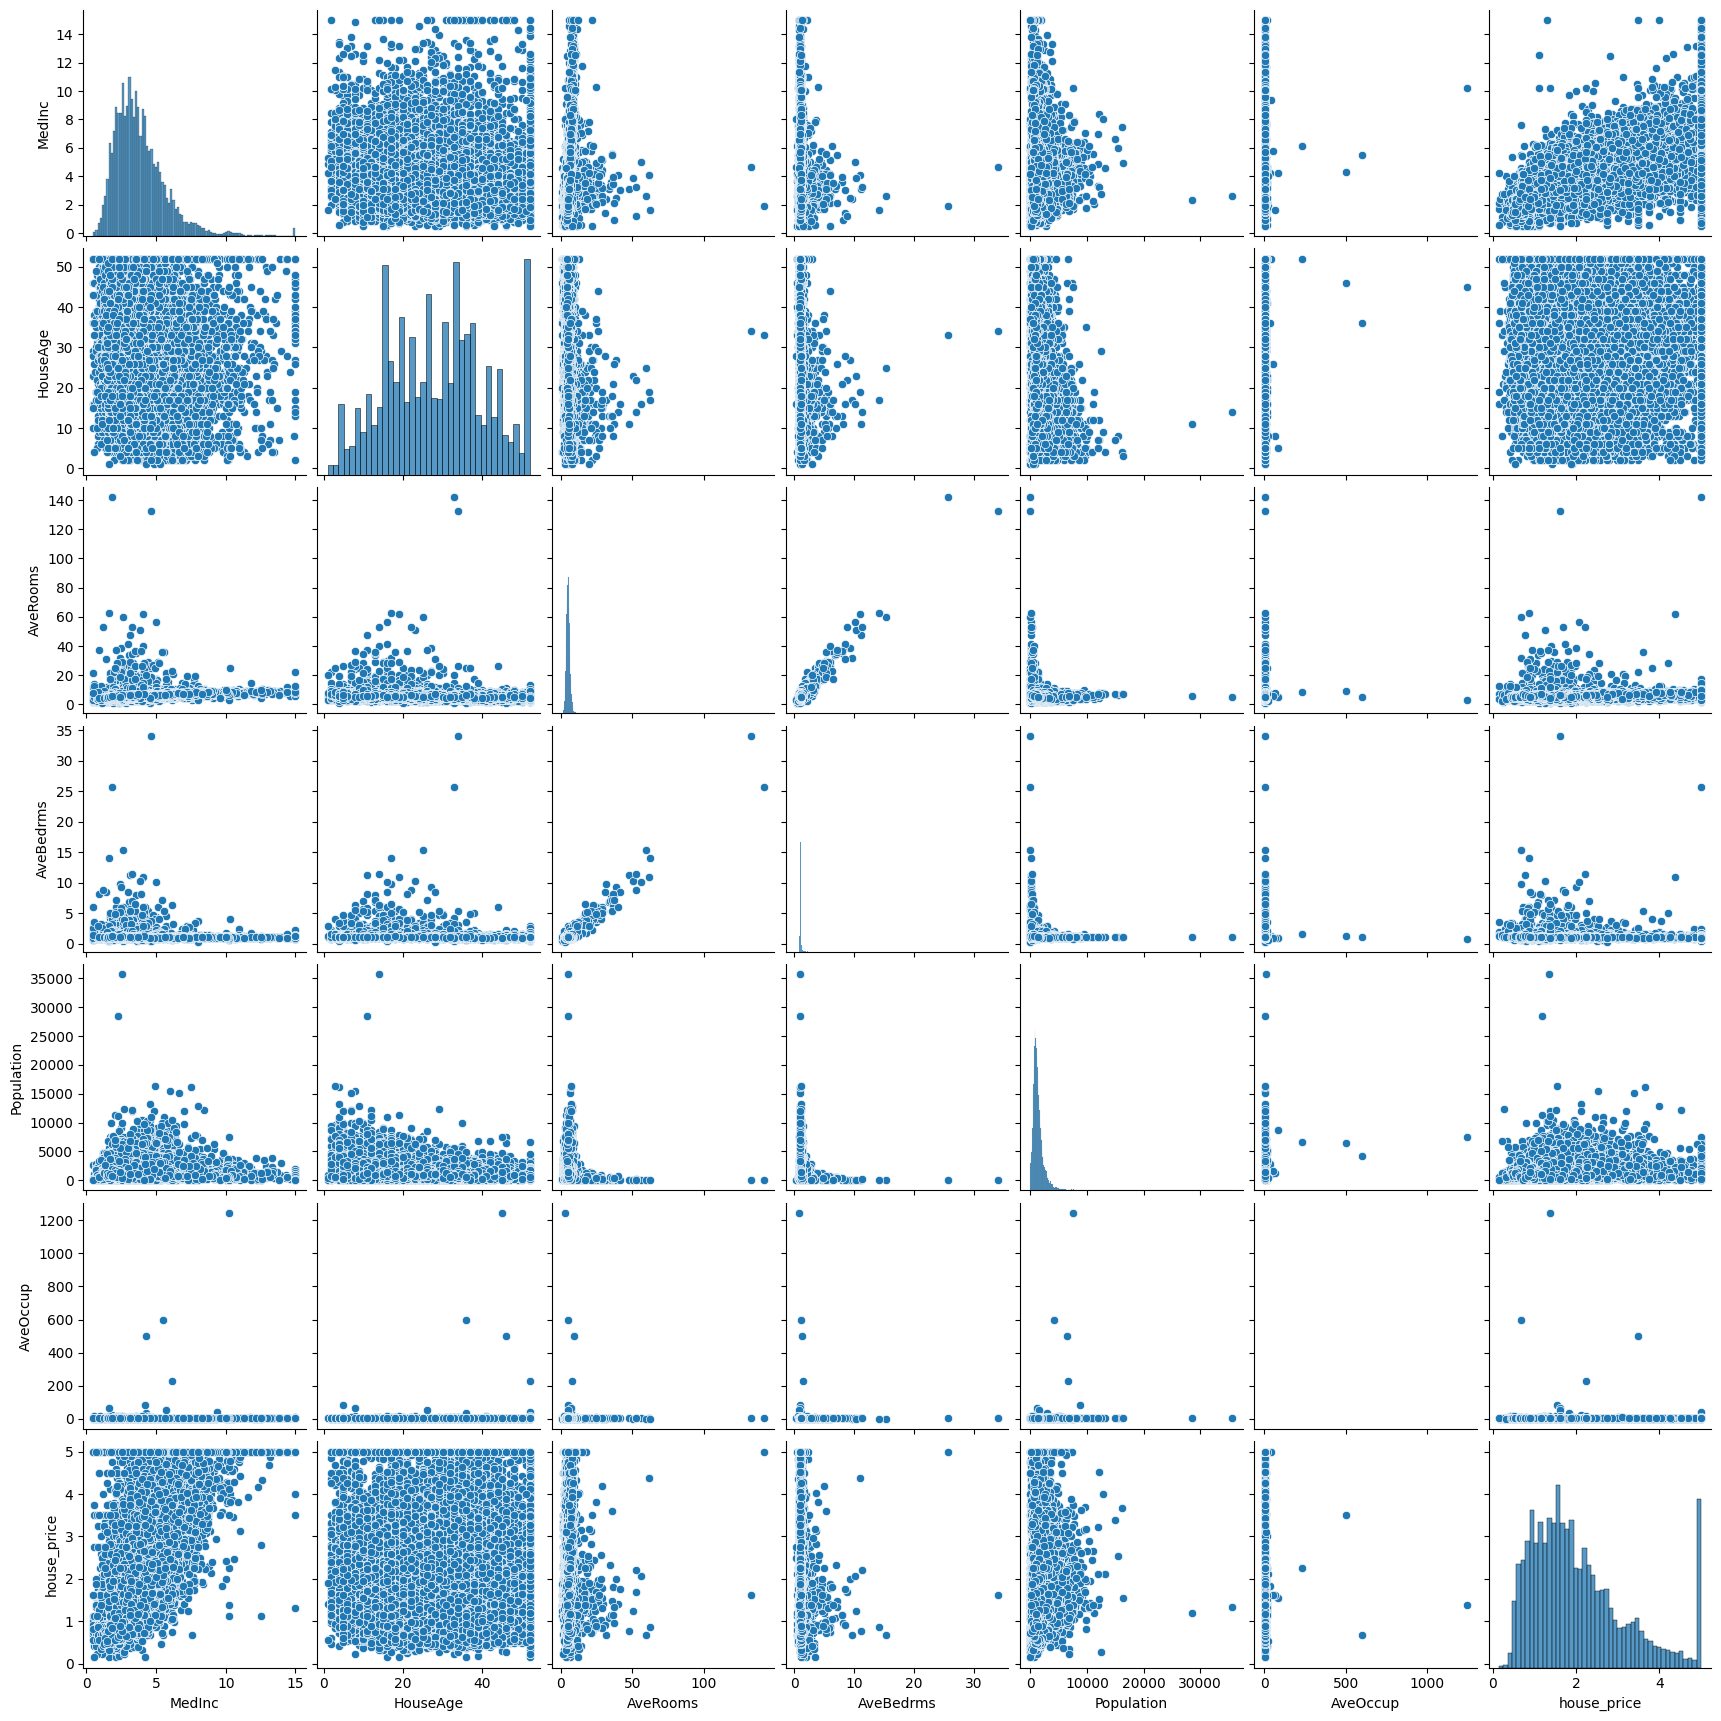

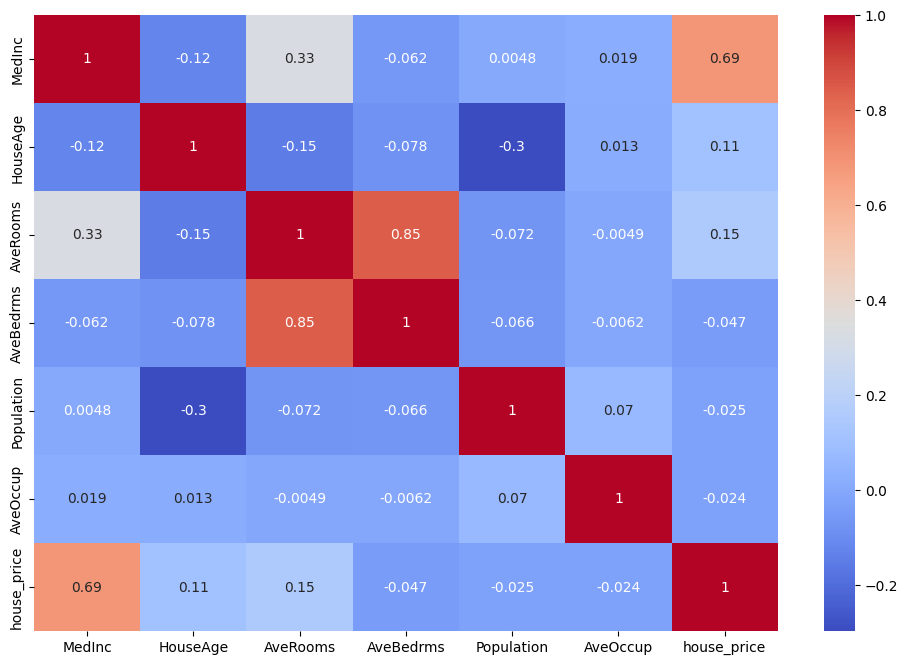

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rsn3584\AppData\Local\Programs\Python\P

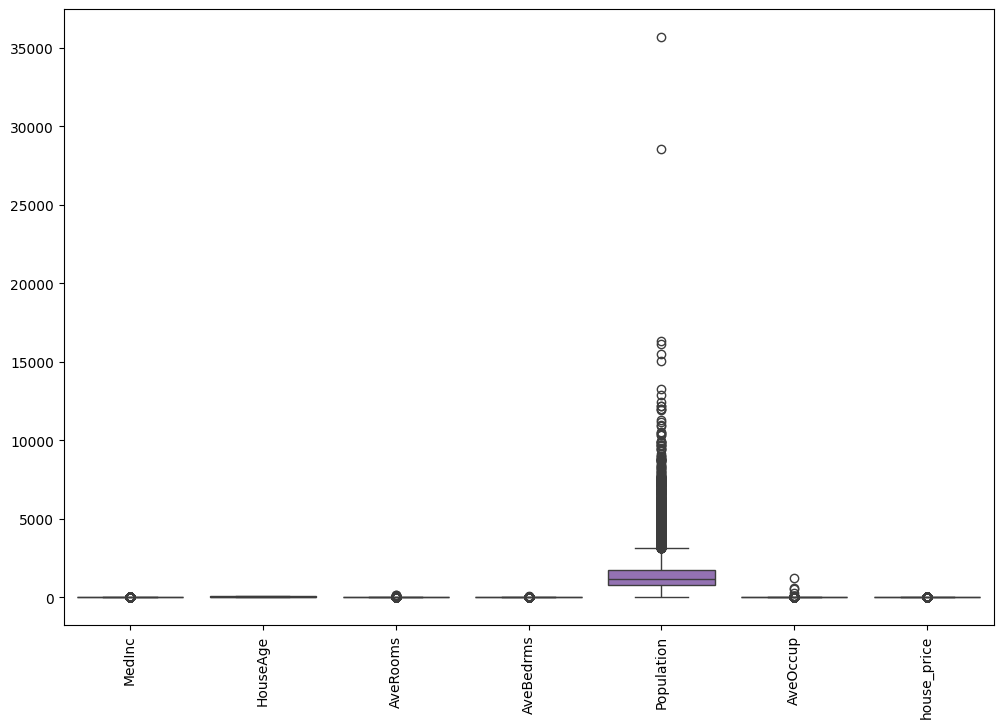

C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\4213832779.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\4213832779.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64
Missing values after imputation:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64
Data after removing outliers:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000   
mean       3.657930     29.447155      5.156007      1.047226   1271.783227   
std        1.444641     12.194464      1.043588      0.066569    627.384658   
min        0.536000      1.000000      2.032738      0.866013      5.000000   
25%        2.561150     19.000000      4.426033      1.002732    814.000000   
50%        3.494650     30.000000      5.142857      1.043733   1160.000000   
75%        4.583300     38.000000      5.850487      1.088686   1637.000000   
max        8.011300   

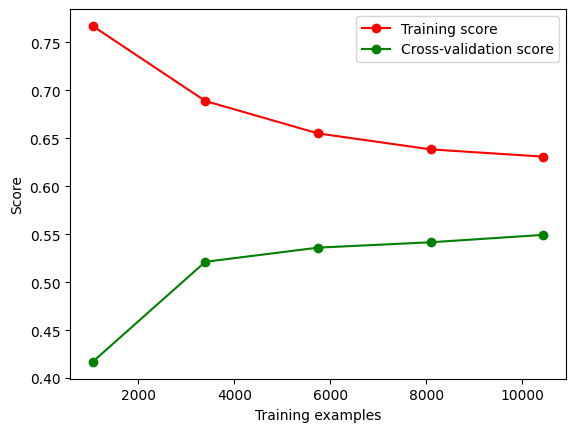


### Kesimpulan
- **Baseline Model**: Decision Tree Regressor dengan r2_score: 0.2198, MSE: 0.7655.
- **Grid Search**: Model terbaik dengan r2_score: 0.5673, MSE: 0.4246.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa terdapat indikasi overfitting.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('california_dataset.csv')

# Display first five rows of the dataset
print("First five rows of the dataset:\n", df.head())

# Drop Latitude and Longitude columns
df = df.drop(columns=['Latitude', 'Longitude'])

# Descriptive statistics
print("Descriptive statistics:\n", df.describe())

# Pairplot to see relationships between variables
sns.pairplot(df)
plt.show()

# Heatmap to see correlations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Boxplot to see distribution and outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Check missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values with median imputation
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

# Verify after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

# Handle outliers with IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verify after removing outliers
print("Data after removing outliers:\n", df.describe())

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Split dataset into training and testing sets
X = df_scaled.drop(columns=['house_price'])
y = df_scaled['house_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model using Decision Tree Regressor
baseline_model = DecisionTreeRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions and evaluation for baseline model
y_pred = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_r2 = r2_score(y_test, y_pred)

print("Baseline MSE:", baseline_mse)
print("Baseline R2 Score:", baseline_r2)

# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

# Evaluate Grid Search model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
grid_mse = mean_squared_error(y_test, y_pred)
grid_r2 = r2_score(y_test, y_pred)

print("Grid Search MSE:", grid_mse)
print("Grid Search R2 Score:", grid_r2)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Describe model performance based on learning curve
def describe_model_performance(train_scores_mean, test_scores_mean):
    if all(train_scores_mean > test_scores_mean):
        return "terdapat indikasi overfitting"
    elif all(train_scores_mean < test_scores_mean):
        return "terdapat indikasi underfitting"
    else:
        return "model menunjukkan performa yang baik"

model_performance_description = describe_model_performance(train_scores_mean, test_scores_mean)

# Conclusion
conclusion = f"""
### Kesimpulan
- **Baseline Model**: Decision Tree Regressor dengan r2_score: {baseline_r2:.4f}, MSE: {baseline_mse:.4f}.
- **Grid Search**: Model terbaik dengan r2_score: {grid_r2:.4f}, MSE: {grid_mse:.4f}.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa {model_performance_description}.
"""

print(conclusion)


### 2. Baseline Modelling + Evaluasi dan bandingkan performanya. Lalu pilih model yang ingin di improve dengan teknik tunning serta berikan alasannya dalam membandingkan model dan memilih model

First five rows of the dataset:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  house_price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Descriptive statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
m

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


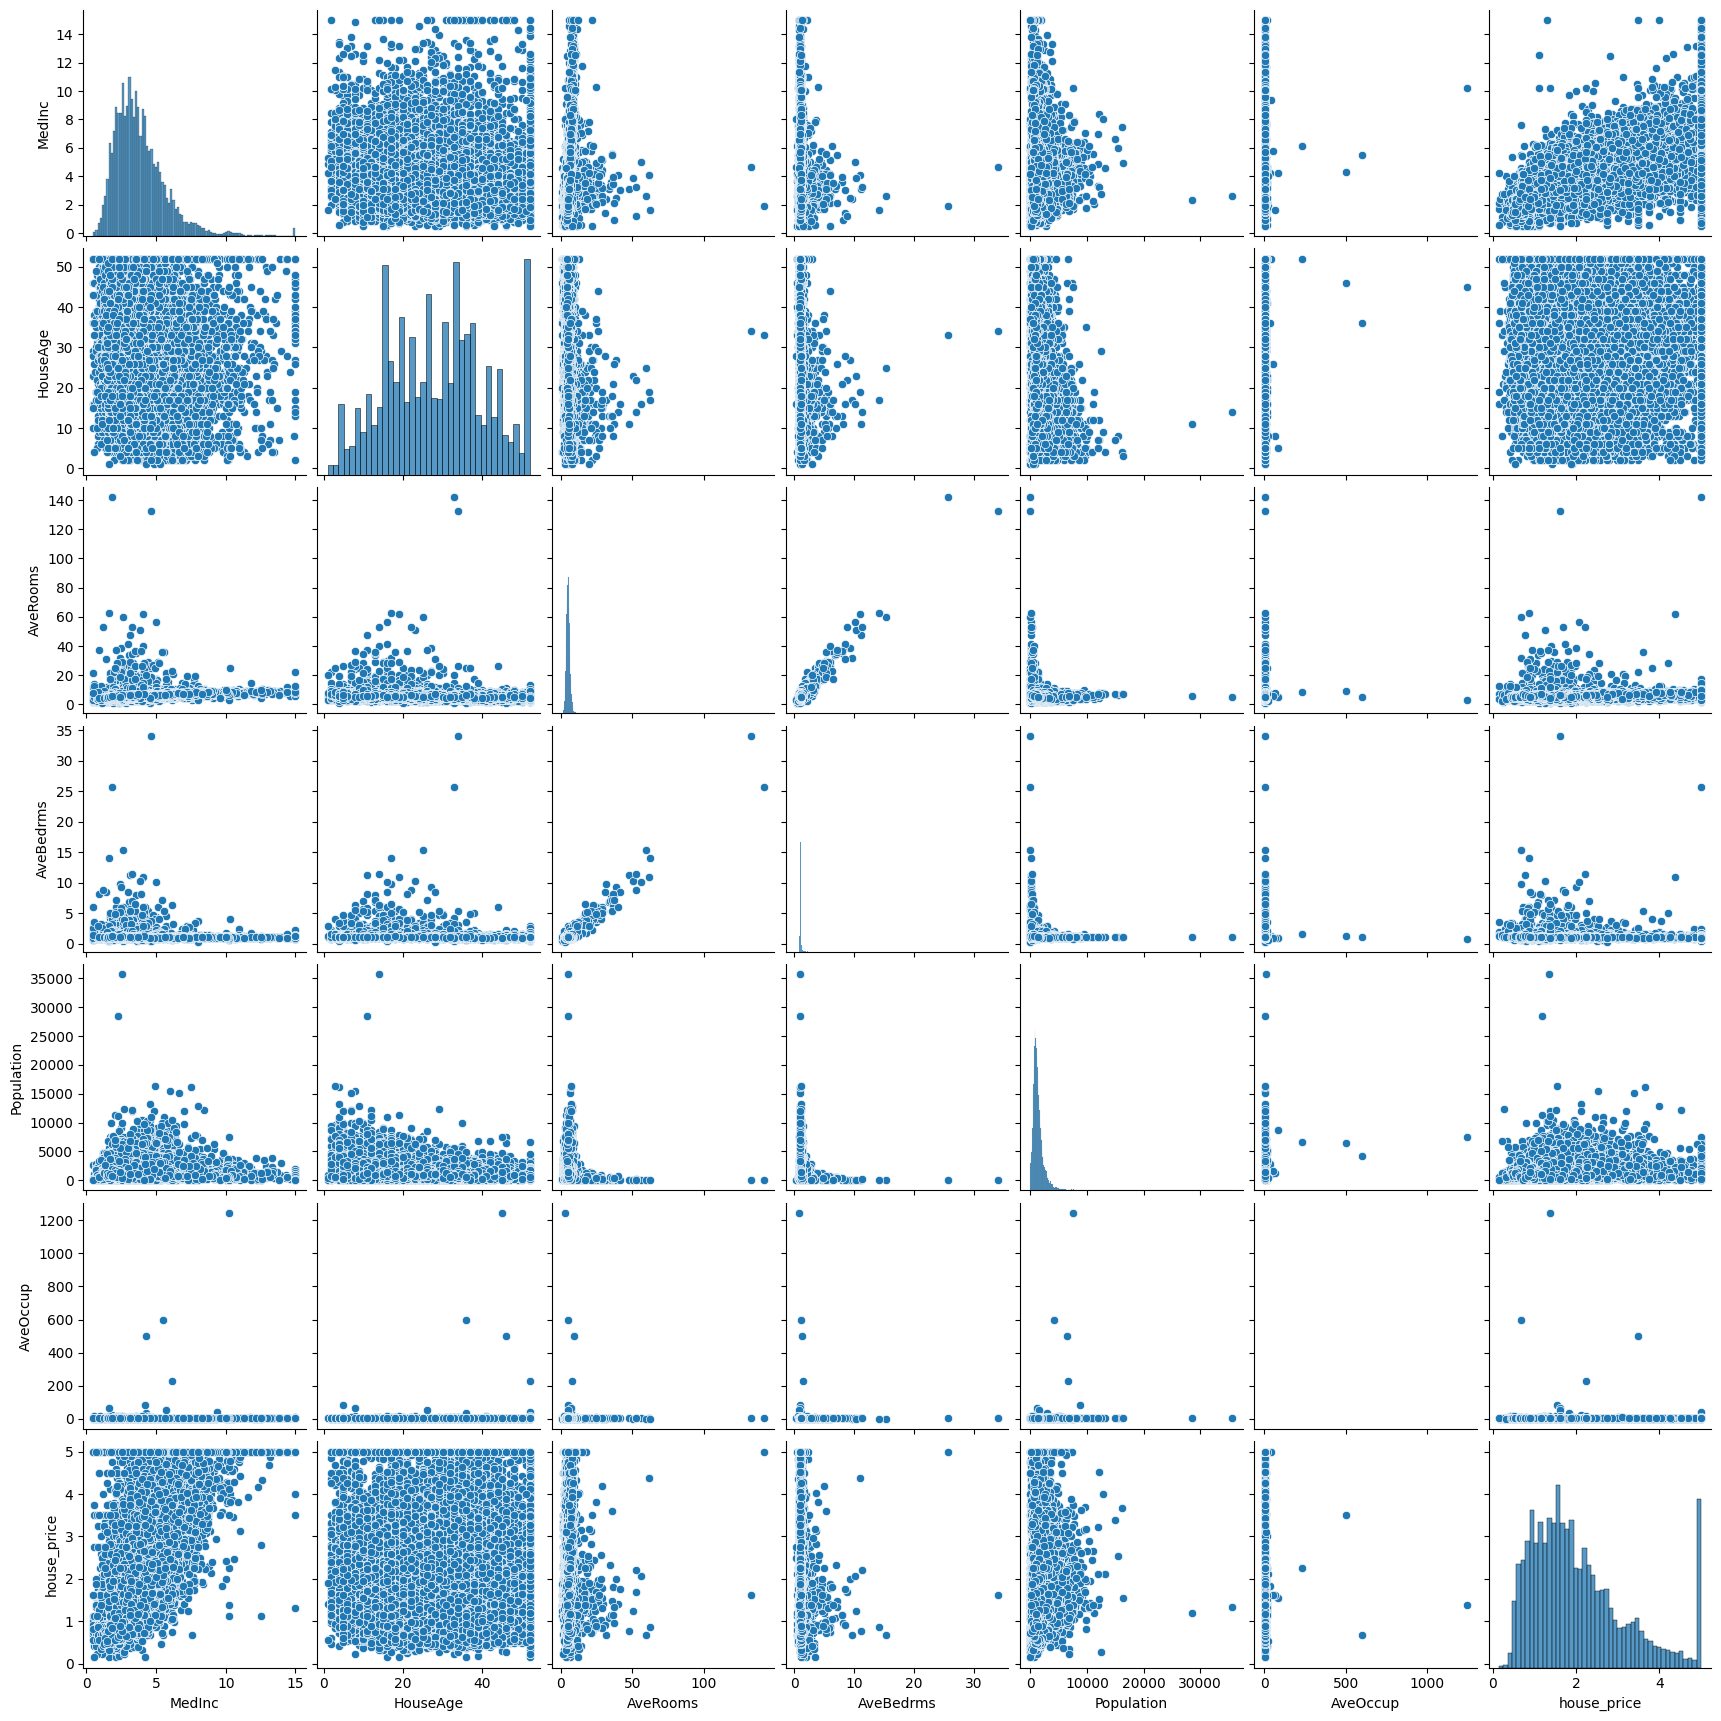

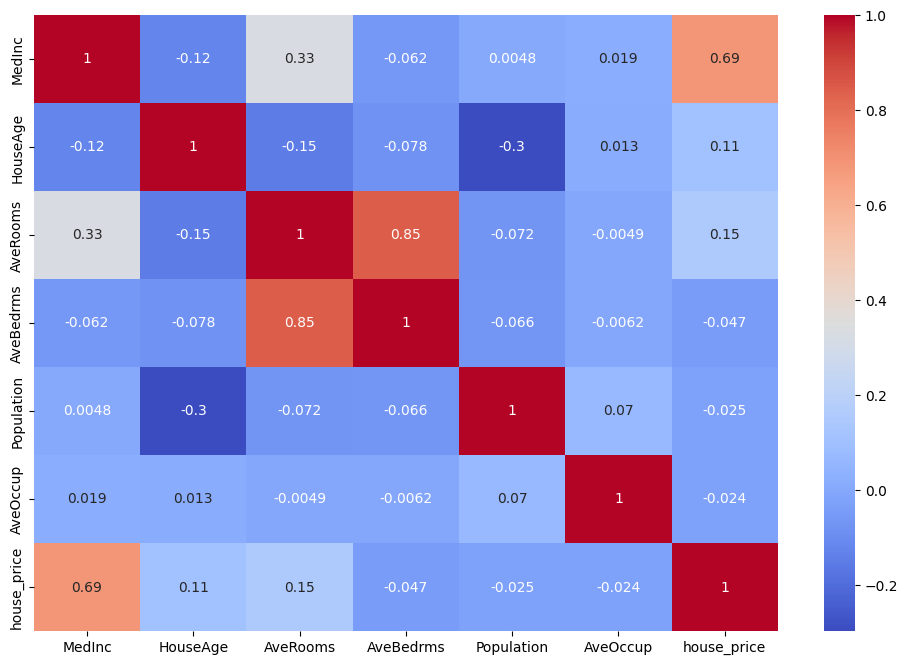

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rsn3584\AppData\Local\Programs\Python\P

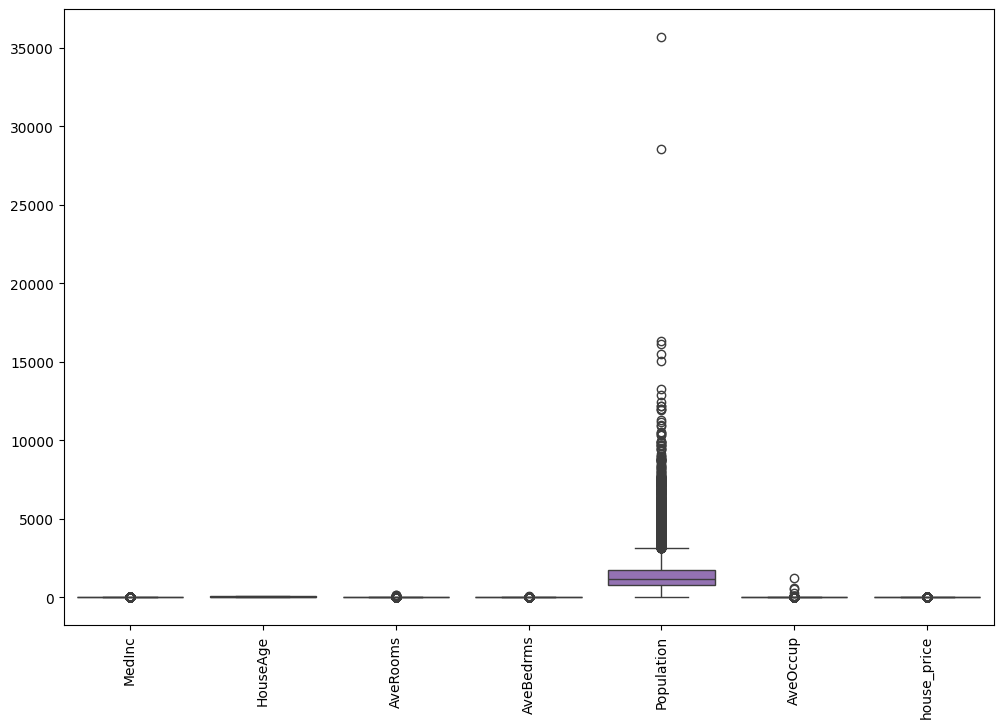

C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\126209230.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\126209230.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64
Missing values after imputation:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64
Data after removing outliers:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000   
mean       3.657930     29.447155      5.156007      1.047226   1271.783227   
std        1.444641     12.194464      1.043588      0.066569    627.384658   
min        0.536000      1.000000      2.032738      0.866013      5.000000   
25%        2.561150     19.000000      4.426033      1.002732    814.000000   
50%        3.494650     30.000000      5.142857      1.043733   1160.000000   
75%        4.583300     38.000000      5.850487      1.088686   1637.000000   
max        8.011300   

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters from Randomized Search: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7}


C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 1, 5] before, using random point [None, 1, 5]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 1, 10] before, using random point [10, 1, 10]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 4, 5] before, using random point [5, 2, 2]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 4, 5] before, using random point [3, 1, 10]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objecti

Best parameters from Bayesian Search: OrderedDict([('max_depth', 7), ('min_samples_leaf', 4), ('min_samples_split', 2)])


[I 2024-05-17 14:15:47,768] Trial 0 finished with value: 0.5308977405798092 and parameters: {'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.5308977405798092.
[I 2024-05-17 14:15:48,029] Trial 1 finished with value: 0.46753432960298785 and parameters: {'max_depth': 23, 'min_samples_split': 15, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.5308977405798092.
[I 2024-05-17 14:15:48,164] Trial 2 finished with value: 0.5276148843738515 and parameters: {'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.5308977405798092.
[I 2024-05-17 14:15:48,421] Trial 3 finished with value: 0.47325335342765307 and parameters: {'max_depth': 26, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.5308977405798092.
[I 2024-05-17 14:15:48,648] Trial 4 finished with value: 0.5434557486359 and parameters: {'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 16}. Best is trial 

Best parameters from Optuna: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 15}
Grid Search MSE: 0.42456799043215426
Grid Search R2 Score: 0.5672705599612183


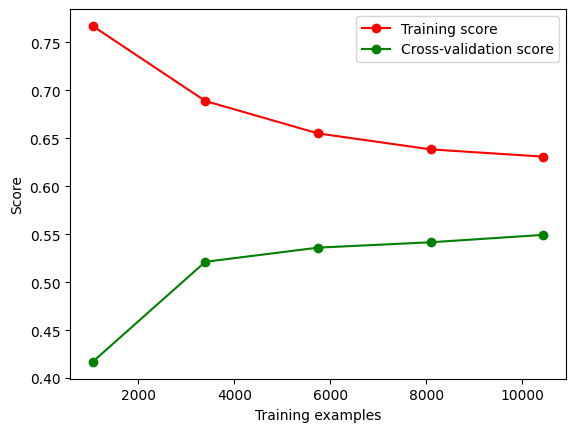


### Kesimpulan
- **Baseline Model**: Lasso Regression dengan r2_score: -0.0012, MSE: 0.9823.
- **Baseline Model**: Decision Tree Regressor dengan r2_score: 0.2198, MSE: 0.7655.
- **Grid Search**: Model terbaik dengan r2_score: 0.5673, MSE: 0.4246.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa terdapat indikasi overfitting.



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import optuna
from skopt import BayesSearchCV

# Load dataset
df = pd.read_csv('california_dataset.csv')

# Display first five rows of the dataset
print("First five rows of the dataset:\n", df.head())

# Drop Latitude and Longitude columns
df = df.drop(columns=['Latitude', 'Longitude'])

# Descriptive statistics
print("Descriptive statistics:\n", df.describe())

# Pairplot to see relationships between variables
sns.pairplot(df)
plt.show()

# Heatmap to see correlations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Boxplot to see distribution and outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Check missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values with median imputation
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

# Verify after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

# Handle outliers with IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verify after removing outliers
print("Data after removing outliers:\n", df.describe())

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Split dataset into training and testing sets
X = df_scaled.drop(columns=['house_price'])
y = df_scaled['house_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model using Lasso Regression
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions and evaluation for Lasso model
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2 Score:", lasso_r2)

# Baseline model using Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree model
y_pred_tree = decision_tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor MSE:", tree_mse)
print("Decision Tree Regressor R2 Score:", tree_r2)

# Choose model to improve
# Based on performance comparison, we choose Decision Tree Regressor for improvement
# Reasons:
# 1. Better performance in terms of MSE and R2 Score compared to Lasso Regression
# 2. Ability to handle non-linear relationships
# 3. Better interpretability with decision tree representation

# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

# Hyperparameter tuning using Randomized Search
random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_grid, n_iter=100, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters from Randomized Search:", random_search.best_params_)

# Hyperparameter tuning using Bayesian Search
bayes_search = BayesSearchCV(estimator=DecisionTreeRegressor(random_state=42), search_spaces=param_grid, n_iter=100, cv=5, scoring='r2', random_state=42)
bayes_search.fit(X_train, y_train)

print("Best parameters from Bayesian Search:", bayes_search.best_params_)

# Hyperparameter tuning using Optuna
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)

    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    return cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters from Optuna:", study.best_trial.params)

# Evaluate tuned model from Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
grid_mse = mean_squared_error(y_test, y_pred)
grid_r2 = r2_score(y_test, y_pred)

print("Grid Search MSE:", grid_mse)
print("Grid Search R2 Score:", grid_r2)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Describe model performance based on learning curve
def describe_model_performance(train_scores_mean, test_scores_mean):
    if all(train_scores_mean > test_scores_mean):
        return "terdapat indikasi overfitting"
    elif all(train_scores_mean < test_scores_mean):
        return "terdapat indikasi underfitting"
    else:
        return "model menunjukkan performa yang baik"

model_performance_description = describe_model_performance(train_scores_mean, test_scores_mean)

# Conclusion
conclusion = f"""
### Kesimpulan
- **Baseline Model**: Lasso Regression dengan r2_score: {lasso_r2:.4f}, MSE: {lasso_mse:.4f}.
- **Baseline Model**: Decision Tree Regressor dengan r2_score: {tree_r2:.4f}, MSE: {tree_mse:.4f}.
- **Grid Search**: Model terbaik dengan r2_score: {grid_r2:.4f}, MSE: {grid_mse:.4f}.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa {model_performance_description}.
"""

print(conclusion)


### 3. Lakukan teknik-teknik Hyperparameter Tunning

First five rows of the dataset:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  house_price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Descriptive statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
m

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


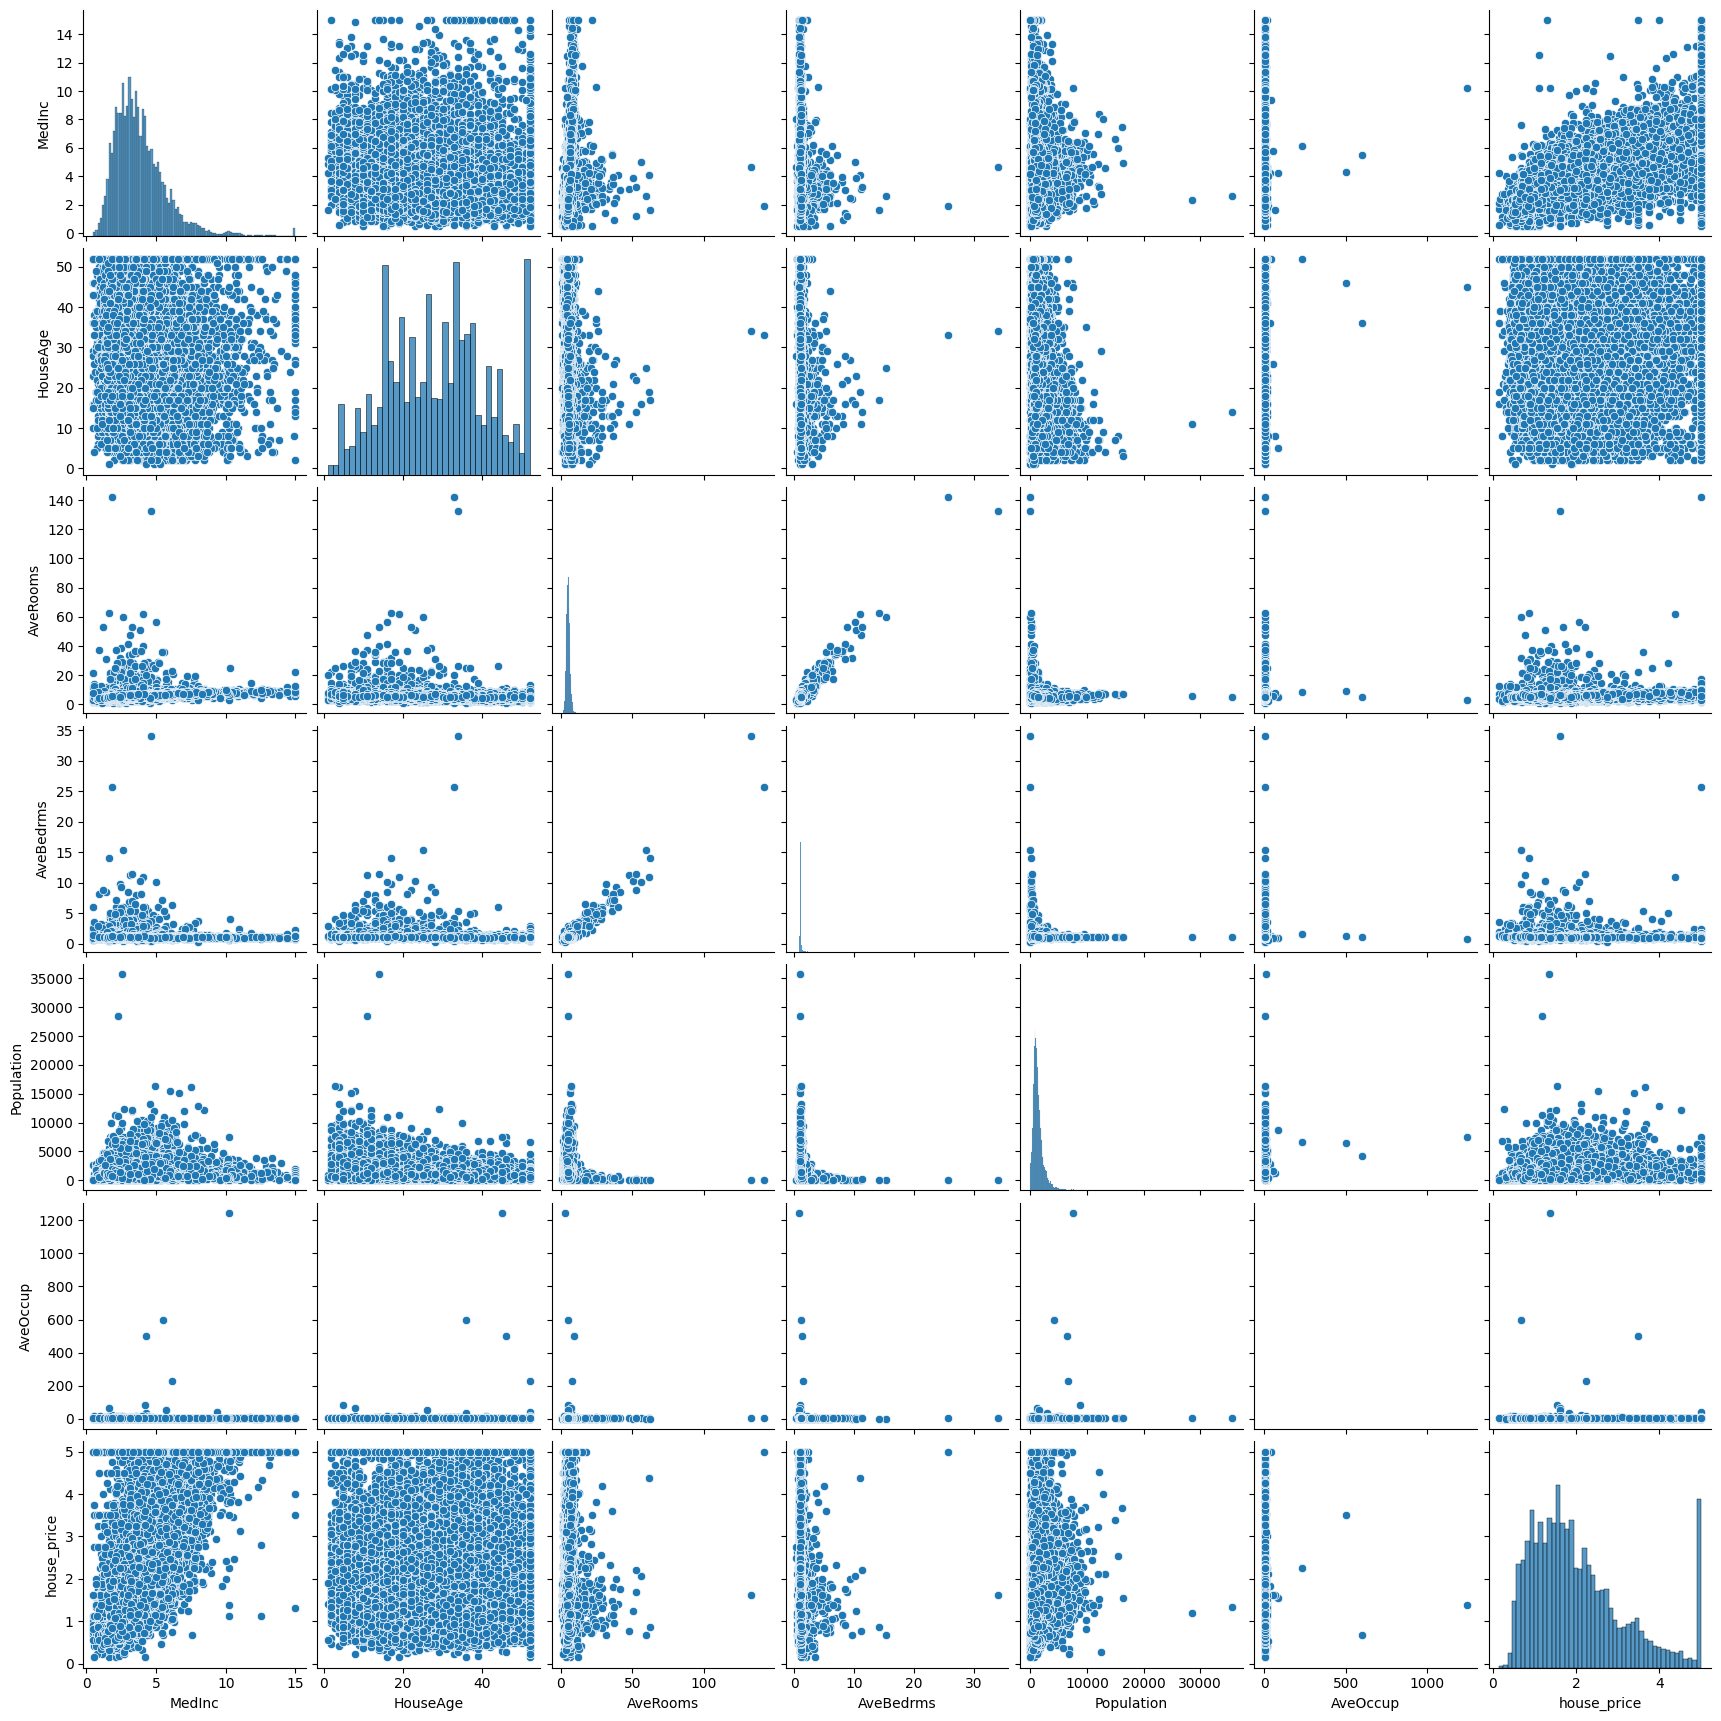

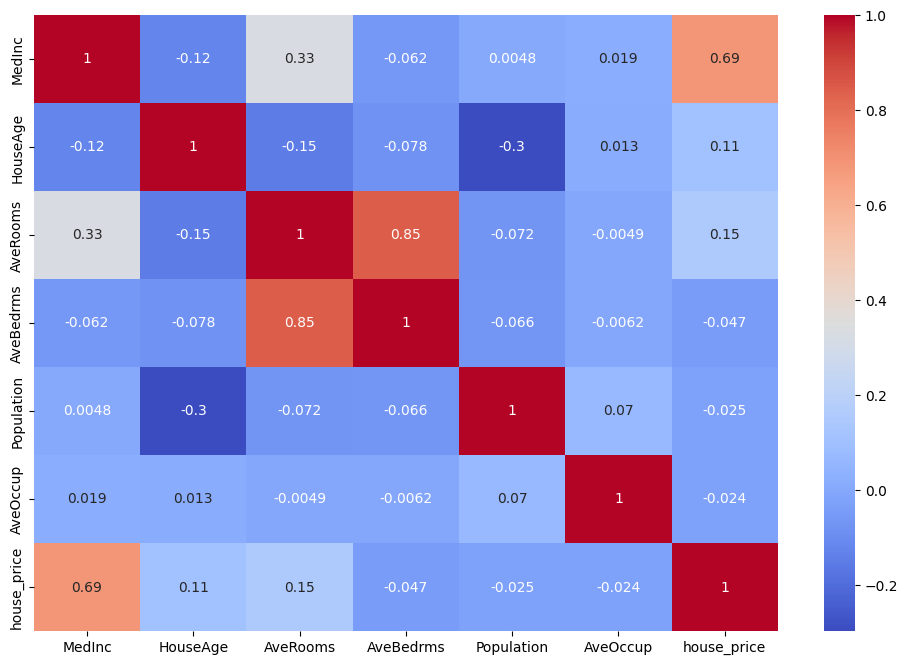

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rsn3584\AppData\Local\Programs\Python\P

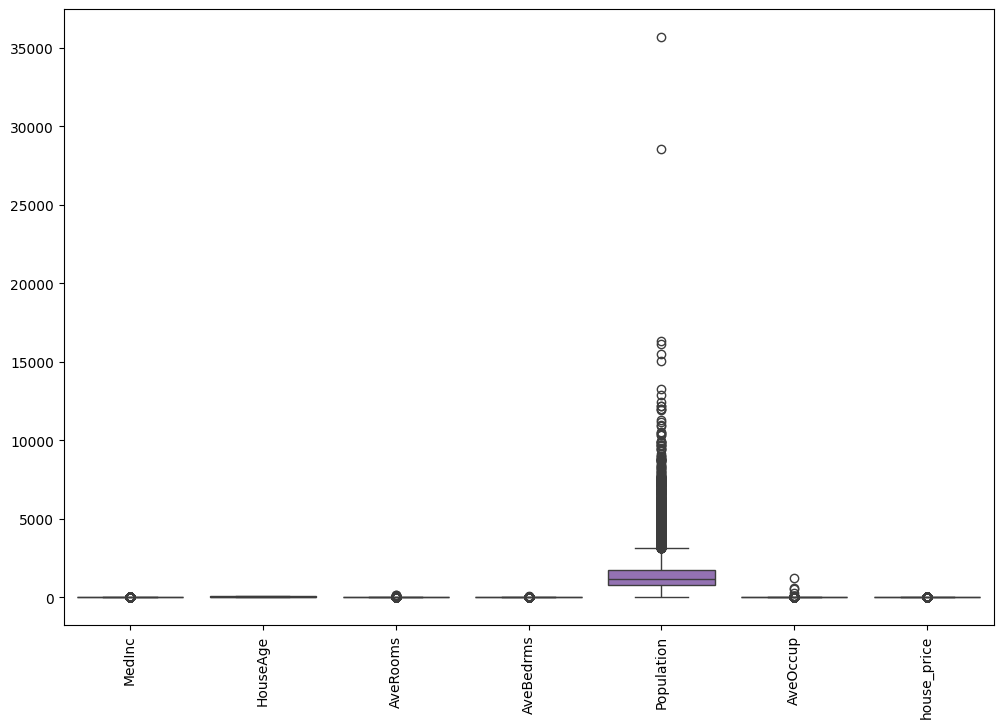

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64
Missing values after imputation:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64
Data after removing outliers:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000   
mean       3.657930     29.447155      5.156007      1.047226   1271.783227   
std        1.444641     12.194464      1.043588      0.066569    627.384658   
min        0.536000      1.000000      2.032738      0.866013      5.000000   
25%        2.561150     19.000000      4.426033      1.002732    814.000000   
50%        3.494650     30.000000      5.142857      1.043733   1160.000000   
75%        4.583300     38.000000      5.850487      1.088686   1637.000000   
max        8.011300   

C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\126209230.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\126209230.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Best parameters from Grid Search: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters from Randomized Search: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7}


C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 1, 5] before, using random point [None, 1, 5]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 1, 10] before, using random point [10, 1, 10]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 4, 5] before, using random point [5, 2, 2]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 4, 5] before, using random point [3, 1, 10]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objecti

Best parameters from Bayesian Search: OrderedDict([('max_depth', 7), ('min_samples_leaf', 4), ('min_samples_split', 2)])


[I 2024-05-17 14:29:18,386] Trial 0 finished with value: 0.4963699660355319 and parameters: {'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.4963699660355319.
[I 2024-05-17 14:29:18,623] Trial 1 finished with value: 0.5295852215018373 and parameters: {'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.5295852215018373.
[I 2024-05-17 14:29:18,737] Trial 2 finished with value: 0.49001368254691513 and parameters: {'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.5295852215018373.
[I 2024-05-17 14:29:18,969] Trial 3 finished with value: 0.5368838900967837 and parameters: {'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 15}. Best is trial 3 with value: 0.5368838900967837.
[I 2024-05-17 14:29:19,242] Trial 4 finished with value: 0.44734273604196495 and parameters: {'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is tria

Best parameters from Optuna: {'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 13}
Grid Search MSE: 0.42456799043215426
Grid Search R2 Score: 0.5672705599612183


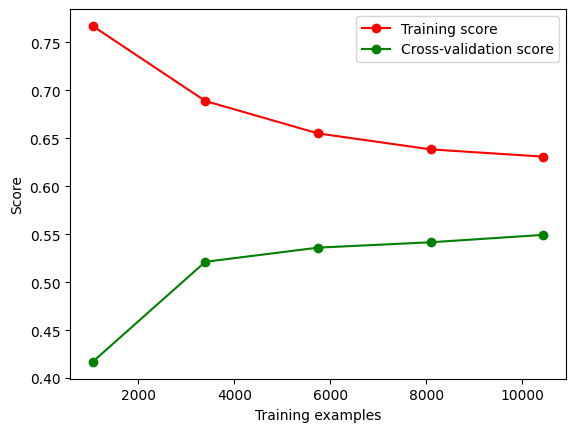


### Kesimpulan
- **Baseline Model**: Lasso Regression dengan r2_score: -0.0012, MSE: 0.9823.
- **Baseline Model**: Decision Tree Regressor dengan r2_score: 0.2198, MSE: 0.7655.
- **Grid Search**: Model terbaik dengan r2_score: 0.5673, MSE: 0.4246.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa terdapat indikasi overfitting.



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import optuna
from skopt import BayesSearchCV

# Load dataset
df = pd.read_csv('california_dataset.csv')

# Display first five rows of the dataset
print("First five rows of the dataset:\n", df.head())

# Drop Latitude and Longitude columns
df = df.drop(columns=['Latitude', 'Longitude'])

# Descriptive statistics
print("Descriptive statistics:\n", df.describe())

# Pairplot to see relationships between variables
sns.pairplot(df)
plt.show()

# Heatmap to see correlations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Boxplot to see distribution and outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Check missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values with median imputation
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

# Verify after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

# Handle outliers with IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verify after removing outliers
print("Data after removing outliers:\n", df.describe())

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Split dataset into training and testing sets
X = df_scaled.drop(columns=['house_price'])
y = df_scaled['house_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model using Lasso Regression
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions and evaluation for Lasso model
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2 Score:", lasso_r2)

# Baseline model using Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree model
y_pred_tree = decision_tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor MSE:", tree_mse)
print("Decision Tree Regressor R2 Score:", tree_r2)

# Choose model to improve
# Based on performance comparison, we choose Decision Tree Regressor for improvement
# Reasons:
# 1. Better performance in terms of MSE and R2 Score compared to Lasso Regression
# 2. Ability to handle non-linear relationships
# 3. Better interpretability with decision tree representation

# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

# Hyperparameter tuning using Randomized Search
random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_grid, n_iter=100, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters from Randomized Search:", random_search.best_params_)

# Hyperparameter tuning using Bayesian Search
bayes_search = BayesSearchCV(estimator=DecisionTreeRegressor(random_state=42), search_spaces=param_grid, n_iter=100, cv=5, scoring='r2', random_state=42)
bayes_search.fit(X_train, y_train)

print("Best parameters from Bayesian Search:", bayes_search.best_params_)

# Hyperparameter tuning using Optuna
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)

    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    return cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters from Optuna:", study.best_trial.params)

# Evaluate tuned model from Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
grid_mse = mean_squared_error(y_test, y_pred)
grid_r2 = r2_score(y_test, y_pred)

print("Grid Search MSE:", grid_mse)
print("Grid Search R2 Score:", grid_r2)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Describe model performance based on learning curve
def describe_model_performance(train_scores_mean, test_scores_mean):
    if all(train_scores_mean > test_scores_mean):
        return "terdapat indikasi overfitting"
    elif all(train_scores_mean < test_scores_mean):
        return "terdapat indikasi underfitting"
    else:
        return "model menunjukkan performa yang baik"

model_performance_description = describe_model_performance(train_scores_mean, test_scores_mean)

# Conclusion
conclusion = f"""
### Kesimpulan
- **Baseline Model**: Lasso Regression dengan r2_score: {lasso_r2:.4f}, MSE: {lasso_mse:.4f}.
- **Baseline Model**: Decision Tree Regressor dengan r2_score: {tree_r2:.4f}, MSE: {tree_mse:.4f}.
- **Grid Search**: Model terbaik dengan r2_score: {grid_r2:.4f}, MSE: {grid_mse:.4f}.
- Berdasarkan learning curve, model Grid Search menunjukkan bahwa {model_performance_description}.
"""

print(conclusion)


### 4. Lakukan Learning Curve dan evaluasi dari tiap hasil proses tunning serta berikan kesimpulan dan insight yang telah didapat dari performa model dalam memilih model terbaik.

First five rows of the dataset:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  house_price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Descriptive statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
m

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


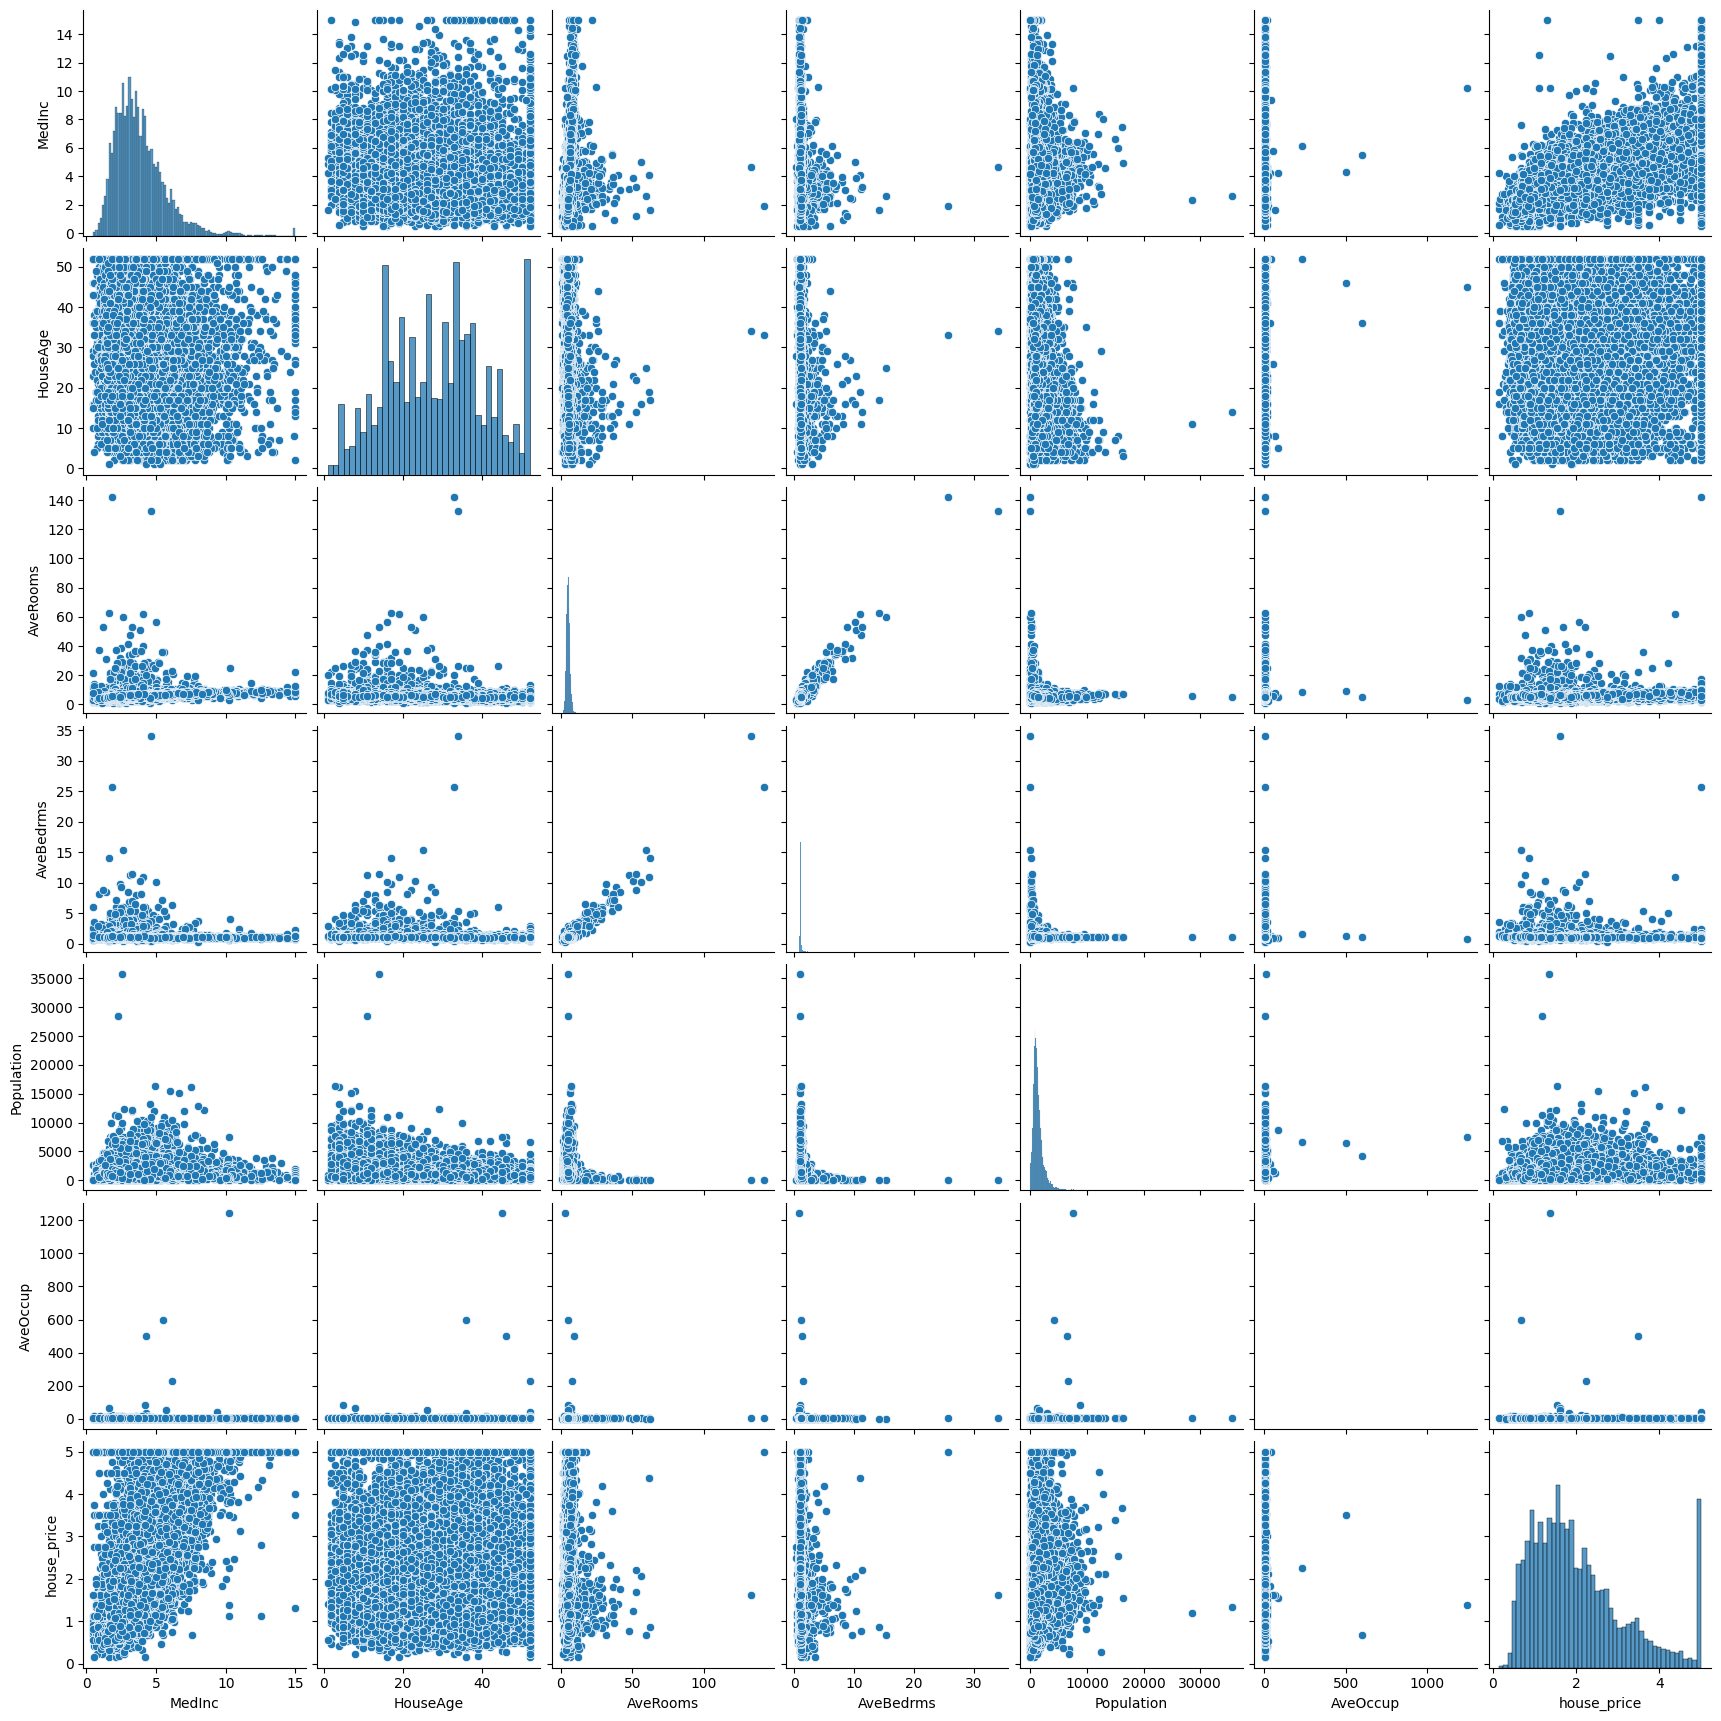

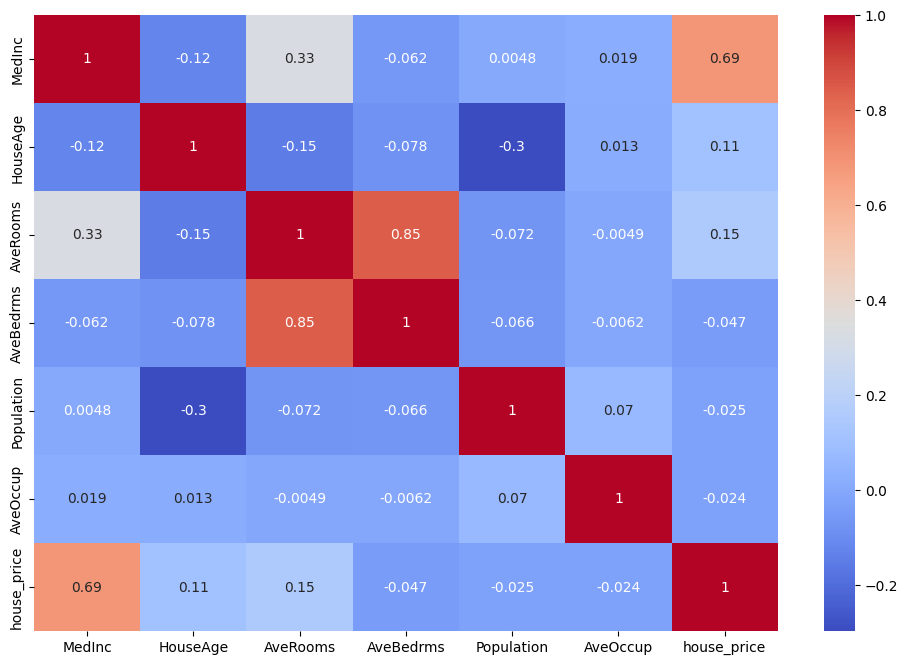

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rsn3584\AppData\Local\Programs\Python\P

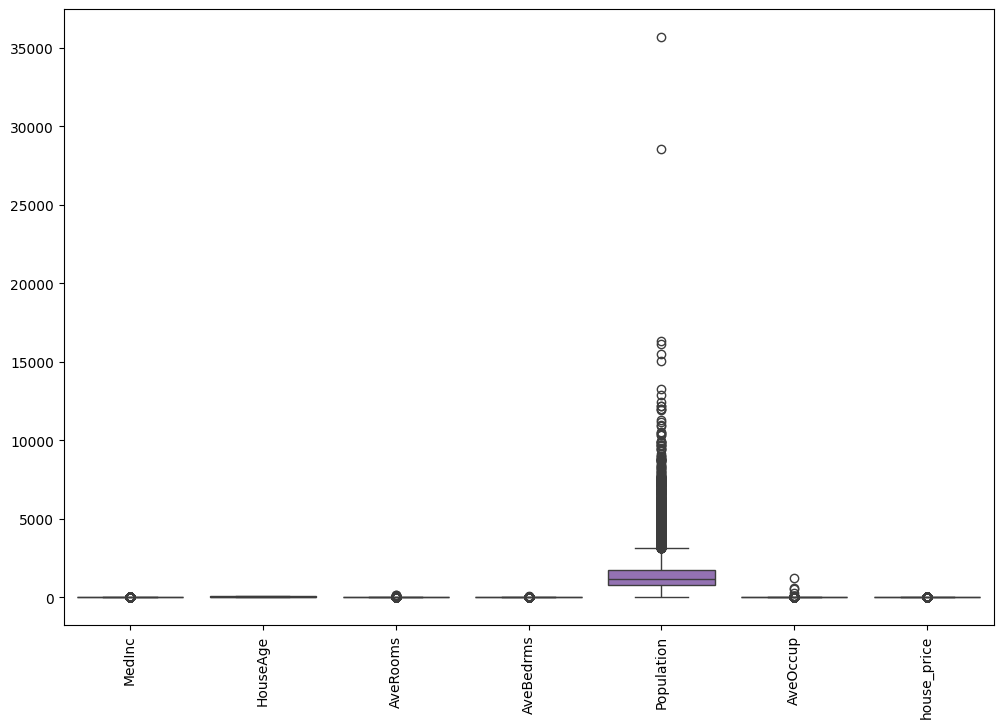

C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\2513420668.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\rsn3584\AppData\Local\Temp\ipykernel_43460\2513420668.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64
Missing values after imputation:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64
Data after removing outliers:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000   
mean       3.657930     29.447155      5.156007      1.047226   1271.783227   
std        1.444641     12.194464      1.043588      0.066569    627.384658   
min        0.536000      1.000000      2.032738      0.866013      5.000000   
25%        2.561150     19.000000      4.426033      1.002732    814.000000   
50%        3.494650     30.000000      5.142857      1.043733   1160.000000   
75%        4.583300     38.000000      5.850487      1.088686   1637.000000   
max        8.011300   

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters from Randomized Search: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7}


C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 1, 5] before, using random point [None, 1, 5]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 1, 10] before, using random point [10, 1, 10]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 4, 5] before, using random point [5, 2, 2]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 4, 5] before, using random point [3, 1, 10]
  warnings.warn(
C:\Users\rsn3584\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objecti

Best parameters from Bayesian Search: OrderedDict([('max_depth', 7), ('min_samples_leaf', 4), ('min_samples_split', 2)])


[I 2024-05-17 14:51:26,897] Trial 0 finished with value: 0.4963699660355319 and parameters: {'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.4963699660355319.
[I 2024-05-17 14:51:27,182] Trial 1 finished with value: 0.4334488275471706 and parameters: {'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.4963699660355319.
[I 2024-05-17 14:51:27,224] Trial 2 finished with value: 0.25030815463071054 and parameters: {'max_depth': 1, 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.4963699660355319.
[I 2024-05-17 14:51:27,452] Trial 3 finished with value: 0.5368838900967837 and parameters: {'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 15}. Best is trial 3 with value: 0.5368838900967837.
[I 2024-05-17 14:51:27,683] Trial 4 finished with value: 0.533610097304889 and parameters: {'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 13}. Best is trial 3

Best parameters from Optuna: {'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 16}
Grid Search MSE: 0.42456799043215426
Grid Search R2 Score: 0.5672705599612183
Randomized Search MSE: 0.42456799043215426
Randomized Search R2 Score: 0.5672705599612183
Bayesian Search MSE: 0.42456799043215426
Bayesian Search R2 Score: 0.5672705599612183
Optuna MSE: 0.42009703295646994
Optuna R2 Score: 0.5718274624326477


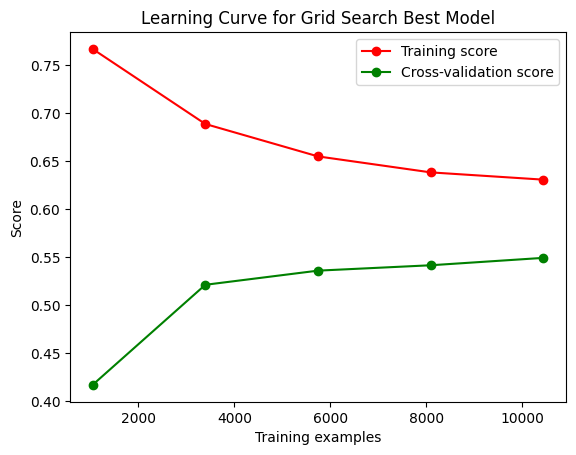

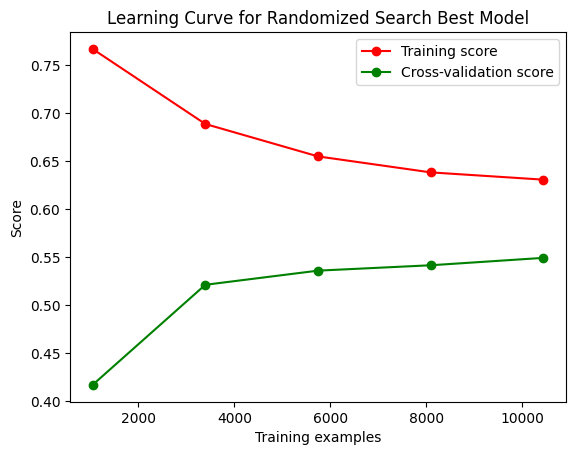

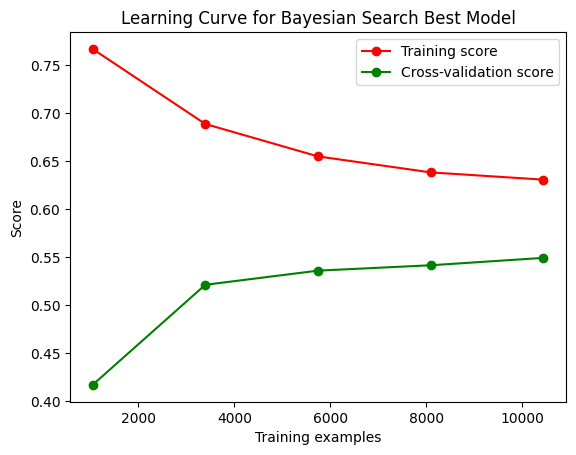

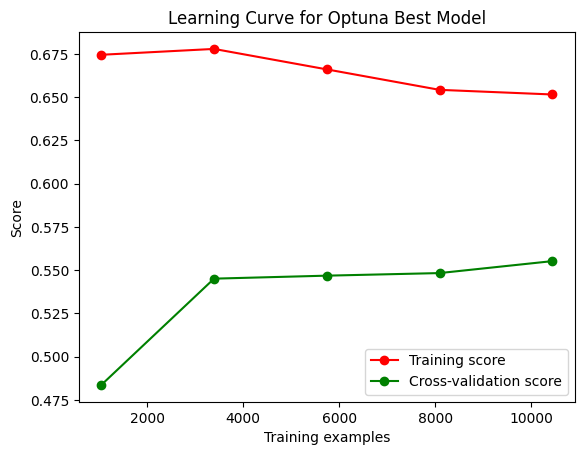


### Kesimpulan
- **Baseline Model**: Lasso Regression dengan r2_score: -0.0012, MSE: 0.9823.
- **Baseline Model**: Decision Tree Regressor dengan r2_score: 0.2198, MSE: 0.7655.
- **Grid Search**: Model terbaik dengan r2_score: 0.5673, MSE: 0.4246. Berdasarkan learning curve, model Grid Search menunjukkan bahwa terdapat indikasi overfitting.
- **Randomized Search**: Model terbaik dengan r2_score: 0.5673, MSE: 0.4246.
- **Bayesian Search**: Model terbaik dengan r2_score: 0.5673, MSE: 0.4246.
- **Optuna**: Model terbaik dengan r2_score: 0.5718, MSE: 0.4201.



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import optuna
from skopt import BayesSearchCV

# Load dataset
df = pd.read_csv('california_dataset.csv')

# Display first five rows of the dataset
print("First five rows of the dataset:\n", df.head())

# Drop Latitude and Longitude columns
df = df.drop(columns=['Latitude', 'Longitude'])

# Descriptive statistics
print("Descriptive statistics:\n", df.describe())

# Pairplot to see relationships between variables
sns.pairplot(df)
plt.show()

# Heatmap to see correlations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Boxplot to see distribution and outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Check missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values with median imputation
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

# Verify after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

# Handle outliers with IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verify after removing outliers
print("Data after removing outliers:\n", df.describe())

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Split dataset into training and testing sets
X = df_scaled.drop(columns=['house_price'])
y = df_scaled['house_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model using Lasso Regression
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions and evaluation for Lasso model
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2 Score:", lasso_r2)

# Baseline model using Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree model
y_pred_tree = decision_tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor MSE:", tree_mse)
print("Decision Tree Regressor R2 Score:", tree_r2)

# Choose model to improve
# Based on performance comparison, we choose Decision Tree Regressor for improvement
# Reasons:
# 1. Better performance in terms of MSE and R2 Score compared to Lasso Regression
# 2. Ability to handle non-linear relationships
# 3. Better interpretability with decision tree representation

# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

# Hyperparameter tuning using Randomized Search
random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_grid, n_iter=100, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters from Randomized Search:", random_search.best_params_)

# Hyperparameter tuning using Bayesian Search
bayes_search = BayesSearchCV(estimator=DecisionTreeRegressor(random_state=42), search_spaces=param_grid, n_iter=100, cv=5, scoring='r2', random_state=42)
bayes_search.fit(X_train, y_train)

print("Best parameters from Bayesian Search:", bayes_search.best_params_)

# Hyperparameter tuning using Optuna
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)

    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    return cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters from Optuna:", study.best_trial.params)

# Evaluate tuned model from Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
grid_mse = mean_squared_error(y_test, y_pred)
grid_r2 = r2_score(y_test, y_pred)

print("Grid Search MSE:", grid_mse)
print("Grid Search R2 Score:", grid_r2)

# Evaluate tuned model from Randomized Search
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
random_mse = mean_squared_error(y_test, y_pred_random)
random_r2 = r2_score(y_test, y_pred_random)

print("Randomized Search MSE:", random_mse)
print("Randomized Search R2 Score:", random_r2)

# Evaluate tuned model from Bayesian Search
best_bayes_model = bayes_search.best_estimator_
y_pred_bayes = best_bayes_model.predict(X_test)
bayes_mse = mean_squared_error(y_test, y_pred_bayes)
bayes_r2 = r2_score(y_test, y_pred_bayes)

print("Bayesian Search MSE:", bayes_mse)
print("Bayesian Search R2 Score:", bayes_r2)

# Evaluate tuned model from Optuna
best_optuna_params = study.best_trial.params
best_optuna_model = DecisionTreeRegressor(**best_optuna_params, random_state=42)
best_optuna_model.fit(X_train, y_train)
y_pred_optuna = best_optuna_model.predict(X_test)
optuna_mse = mean_squared_error(y_test, y_pred_optuna)
optuna_r2 = r2_score(y_test, y_pred_optuna)

print("Optuna MSE:", optuna_mse)
print("Optuna R2 Score:", optuna_r2)

# Plot learning curve for Grid Search best model
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve for Grid Search Best Model')
plt.show()

# Plot learning curve for Randomized Search best model
train_sizes, train_scores, test_scores = learning_curve(best_random_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve for Randomized Search Best Model')
plt.show()

# Plot learning curve for Bayesian Search best model
train_sizes, train_scores, test_scores = learning_curve(best_bayes_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve for Bayesian Search Best Model')
plt.show()

# Plot learning curve for Optuna best model
train_sizes, train_scores, test_scores = learning_curve(best_optuna_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve for Optuna Best Model')
plt.show()

# Describe model performance based on learning curve
def describe_model_performance(train_scores_mean, test_scores_mean):
    if all(train_scores_mean > test_scores_mean):
        return "terdapat indikasi overfitting"
    elif all(train_scores_mean < test_scores_mean):
        return "terdapat indikasi underfitting"
    else:
        return "model menunjukkan performa yang baik"

# Grid Search Model Performance
grid_model_performance_description = describe_model_performance(train_scores_mean, test_scores_mean)

# Conclusion
conclusion = f"""
### Kesimpulan
- **Baseline Model**: Lasso Regression dengan r2_score: {lasso_r2:.4f}, MSE: {lasso_mse:.4f}.
- **Baseline Model**: Decision Tree Regressor dengan r2_score: {tree_r2:.4f}, MSE: {tree_mse:.4f}.
- **Grid Search**: Model terbaik dengan r2_score: {grid_r2:.4f}, MSE: {grid_mse:.4f}. Berdasarkan learning curve, model Grid Search menunjukkan bahwa {grid_model_performance_description}.
- **Randomized Search**: Model terbaik dengan r2_score: {random_r2:.4f}, MSE: {random_mse:.4f}.
- **Bayesian Search**: Model terbaik dengan r2_score: {bayes_r2:.4f}, MSE: {bayes_mse:.4f}.
- **Optuna**: Model terbaik dengan r2_score: {optuna_r2:.4f}, MSE: {optuna_mse:.4f}.
"""

print(conclusion)
